# Example study

This section demonstrates a simple trade study using four variables - wing loading, power loading, aspect ratio, and maximum takeoff weight (MTOW).

The MTOW and performanc constraints are evaluated using the functions defined in [code setup section](setup.md).

The aspect ratio is set to 7, 8, 9, and 10.

The wing loading is varied from 20 $\text{lbs}/\text{ft}^2$ to 45 $\text{lbs}/\text{ft}^2$

The power loading is varied from 7 lbs/hp to 15 lbs/hp

Below code defines a function to create a plot of MTOW contours for a range of wing and power loading, along with the feasible

In [10]:
import nbimporter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mtow import compute_takeoff_weight
from constraint import compute_takeoff_groundroll, compute_landing_groundroll, compute_climb_gradient

max_ground_roll = 1500 # ft
min_oei_cgr = 0.015

def plot_trade_study(A):
    """
        Function to create a trade study plot for a given A
    """

    num_pts = 15
    wing_loading = np.linspace(30, 60, num_pts) # lbs/sq ft
    power_loading = np.linspace(6, 12, num_pts) # lbs/hp

    X, Y = np.meshgrid(wing_loading, power_loading) # create a grid of (W/S,W/P) for evaluations

    mtow = np.zeros_like(X) # empty MTOW array
    takeoff_req = np.zeros_like(X) # empty TO array
    landing_req = np.zeros_like(X) # empty L array
    cgr_req = np.zeros_like(X) # empty cgr array
    cruise_speed_red = np.zeros_like(X) # empty array

    # Compute MTOW for each grid point
    for i in range(num_pts):
        for j in range(num_pts):

            WS = X[i,j]
            WP = Y[i,j]

            mtow[i,j], final_parameters = compute_takeoff_weight(WS, WP, A) # lbs
            final_parameters.MTOW = mtow[i,j]

            takeoff_req[i,j] = compute_takeoff_groundroll(final_parameters) - max_ground_roll
            landing_req[i,j] = compute_landing_groundroll(final_parameters) - max_ground_roll
            cgr_req[i,j] = min_oei_cgr - compute_climb_gradient(final_parameters)
            cruise_speed_red[i,j] = final_parameters.avg_cruise_power - final_parameters.P_cruise

    # Plotting
    levels = np.array([4500, 4800, 5200, 6000, 7500])
    fs = 11
    fig, ax = plt.subplots(figsize=(8,6))

    # MTOW contours
    cp = ax.contour(X, Y, mtow, levels=levels, colors="k")
    ax.clabel(cp, cp.levels, fontsize=fs, fmt=lambda x: f'W = {x:.0f} lbs')

    # TO constraints
    ax.contour(X, Y, takeoff_req, colors="r", levels=[0])
    mpl.rcParams['hatch.color'] = "r"
    ax.contourf(X, Y, takeoff_req, levels=[0, 50], colors='none', hatches=['//'])

    # L constraints
    ax.contour(X, Y, landing_req, colors="c", levels=[0])
    mpl.rcParams['hatch.color'] = "c"
    ax.contourf(X, Y, landing_req, levels=[0, 50], colors='none', hatches=['//'])

    # OEI constraints
    ax.contour(X, Y, cgr_req, colors="g", levels=[0])
    mpl.rcParams['hatch.color'] = "g"
    ax.contourf(X, Y, cgr_req, levels=[0, 0.003], colors='none', hatches=['//'])

    # Cruise speed
    ax.contour(X, Y, cruise_speed_red, colors="b", levels=[0])
    mpl.rcParams['hatch.color'] = "b"
    ax.contourf(X, Y, cruise_speed_red, levels=[0, 15], colors='none', hatches=['//'])

    # Asthetics
    ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
    ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
    ax.set_title(f"Aspect ratio: {A}", fontsize=fs+1)
    ax.tick_params(axis='both', labelsize=fs-0.5)

Below code block performs trade study for the selected range of aspect ratio values:

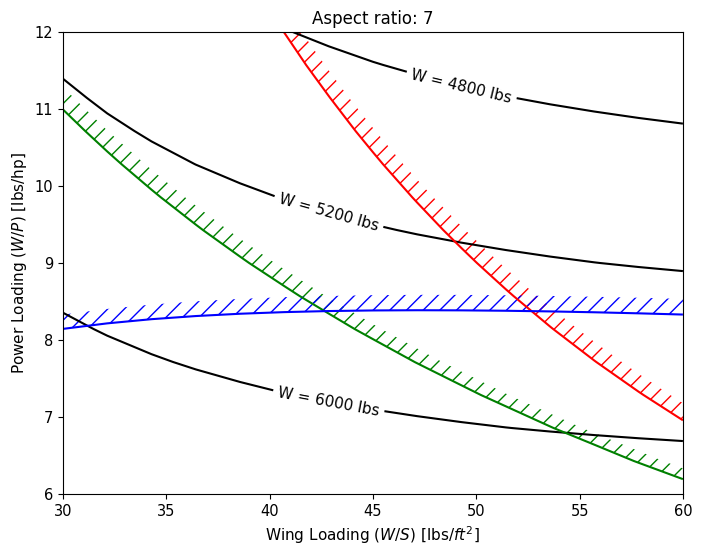

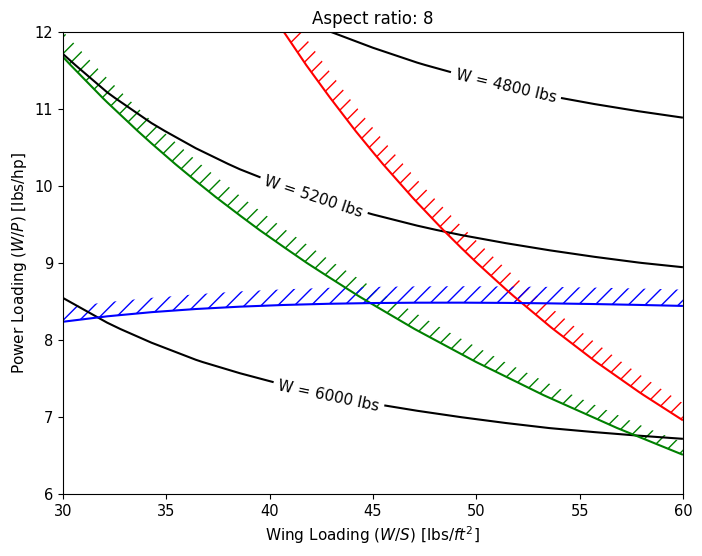

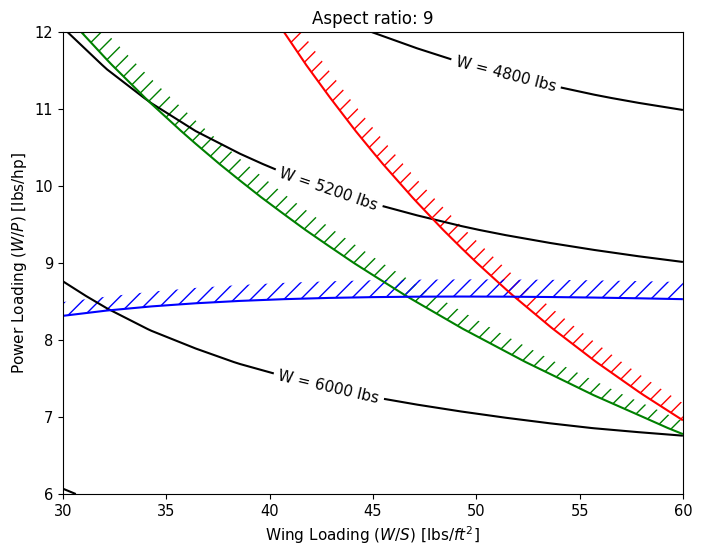

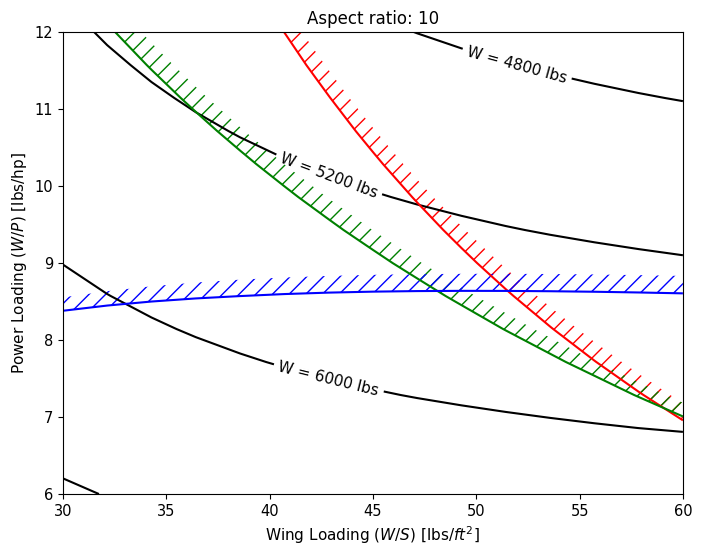

In [11]:
A = [7,8,9,10]

best_mtow = []
best_wing_loading = []
best_power_loading = []

for val in A:
    plot_trade_study(val)